In [1]:
import csv
import matplotlib.pyplot as plt
import os, re, cv2
import numpy as np
import pandas as pd

In [2]:
base_wp_3 = pd.read_csv('../../third/topics/bagfile-_base_waypoints.csv')
final_wp_3 = pd.read_csv('../../third/topics/bagfile-_final_waypoints.csv')

In [3]:
base_wp = pd.read_csv('../../fourth/base_waypoints.csv')
final_wp = pd.read_csv('../../fourth/final_waypoints.csv')

In [80]:
base_wp

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.waypoints0.pose.header.seq,field.waypoints0.pose.header.stamp,field.waypoints0.pose.header.frame_id,field.waypoints0.pose.pose.position.x,field.waypoints0.pose.pose.position.y,field.waypoints0.pose.pose.position.z,...,field.waypoints87.pose.pose.orientation.w,field.waypoints87.twist.header.seq,field.waypoints87.twist.header.stamp,field.waypoints87.twist.header.frame_id,field.waypoints87.twist.twist.linear.x,field.waypoints87.twist.twist.linear.y,field.waypoints87.twist.twist.linear.z,field.waypoints87.twist.twist.angular.x,field.waypoints87.twist.twist.angular.y,field.waypoints87.twist.twist.angular.z
0,1510945980252262232,2,0,/world,0,0,NaN,12.1159,-1.6784,1.394,...,0.147308,0,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
base_waypoints = dict()
for idx, item in base_wp.iteritems():
    if "position" in idx or "twist.twist.linear" in idx:
        waypoint_idx = idx.split(".")[1]
        result = re.search("\d+", waypoint_idx)
        idx_key = int(result.group())
        if idx_key not in base_waypoints:
            base_waypoints[idx_key] = dict()
        if "linear.x" in idx:
            base_waypoints[idx_key]['v'] = item.values[0]
        else:
            print idx[-1], " ", item.values[0]
            base_waypoints[idx_key][idx[-1]] = item.values[0]

x   12.1159
y   -1.6784
z   1.394
y   0.0
z   0.0
x   10.9708
y   -1.7142
z   1.312
y   0.0
z   0.0
x   9.8253
y   -1.5559
z   1.2726
y   0.0
z   0.0
x   8.7089
y   -1.3607
z   1.2264
y   0.0
z   0.0
x   7.481
y   -1.1362
z   1.1303
y   0.0
z   0.0
x   6.2141
y   -0.7949
z   1.0682
y   0.0
z   0.0
x   5.2122
y   -0.527
z   1.0342
y   0.0
z   0.0
x   4.242
y   -0.2501
z   0.9562
y   0.0
z   0.0
x   3.2563
y   0.153
z   0.9253
y   0.0
z   0.0
x   2.3027
y   0.469
z   0.8345
y   0.0
z   0.0
x   1.3117
y   0.7697
z   0.7847
y   0.0
z   0.0
x   0.3038
y   1.1628
z   0.7166
y   0.0
z   0.0
x   -0.6416
y   1.568
z   0.6721
y   0.0
z   0.0
x   -1.5375
y   2.0244
z   0.5752
y   0.0
z   0.0
x   -2.6953
y   2.6367
z   0.5169
y   0.0
z   0.0
x   -3.707
y   3.3719
z   0.4156
y   0.0
z   0.0
x   -4.6875
y   4.0777
z   0.3358
y   0.0
z   0.0
x   -5.5994
y   4.913
z   0.2576
y   0.0
z   0.0
x   -6.402
y   5.8593
z   0.1905
y   0.0
z   0.0
x   -6.9396
y   6.9093
z   0.1255
y   0.0
z   0.0
x   -7.3225
y

In [4]:
base_waypoints = dict()
for idx, item in base_wp.iteritems():
    if "position" in idx:
        waypoint_idx = idx.split(".")[1]
        result = re.search("\d+", waypoint_idx)
        idx_key = int(result.group())
        if idx_key not in base_waypoints:
            base_waypoints[idx_key] = dict()
        
        base_waypoints[idx_key][idx[-1]] = item.values[0]

In [17]:
base_waypoints[0]

{'x': 12.1159, 'y': -1.6783999999999999, 'z': 1.3940000000000001}

In [5]:
xs = []
ys = []
for idx, wp in base_waypoints.iteritems():
    xs.append(wp['x'])
    ys.append(wp['y'])

In [106]:
final_waypoints = list()
for i, row in final_wp.iterrows():
    final_waypoints.append(dict())
    for idx, item in row.iteritems():
        if "position" in idx:
            waypoint_idx = idx.split(".")[1]
            result = re.search("\d+", waypoint_idx)
            idx_key = int(result.group())
            if idx_key not in final_waypoints[i]:
                final_waypoints[i][idx_key] = dict()
            if idx[-1] not in final_waypoints[i][idx_key]:
                final_waypoints[i][idx_key][idx[-1]] = list()
            if item not in final_waypoints[i][idx_key][idx[-1]]:
                final_waypoints[i][idx_key][idx[-1]].append(item)

In [107]:
final_xs = []
final_ys = []
for fwps in final_waypoints:
    for idx, wp in fwps.iteritems():
        final_xs.append(wp['x'][0])
        final_ys.append(wp['y'][0])

In [108]:
len(final_xs)

3080

In [6]:
base_waypoints_3 = dict()
for idx, item in base_wp_3.iteritems():
    if "position" in idx:
        waypoint_idx = idx.split(".")[1]
        result = re.search("\d+", waypoint_idx)
        idx_key = int(result.group())
        if idx_key not in base_waypoints_3:
            base_waypoints_3[idx_key] = dict()
        base_waypoints_3[idx_key][idx[-1]] = item.values[0]

In [14]:
xs_3 = []
ys_3 = []
for idx, wp in base_waypoints_3.iteritems():
    xs_3.append(wp['x'])
    ys_3.append(wp['y'])

In [12]:
final_waypoints_3 = dict()
for _, row in final_wp_3.iterrows():
    for idx, item in row.iteritems():
        if "position" in idx:
            waypoint_idx = idx.split(".")[1]
            result = re.search("\d+", waypoint_idx)
            idx_key = int(result.group())
            if idx_key not in final_waypoints_3:
                final_waypoints_3[idx_key] = dict()
            if idx[-1] not in final_waypoints_3[idx_key]:
                final_waypoints_3[idx_key][idx[-1]] = list()
            if item not in final_waypoints_3[idx_key][idx[-1]]:
                final_waypoints_3[idx_key][idx[-1]].append(item)

In [13]:
final_xs_3 = []
final_ys_3 = []
for idx, wp in final_waypoints_3.iteritems():
    final_xs_3.append(wp['x'][0])
    final_ys_3.append(wp['y'][0])

In [64]:
current_pose_3 = pd.read_csv('../../third/topics/bagfile-_current_pose.csv')
current_pose_3.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.pose.position.x,field.pose.position.y,field.pose.position.z,field.pose.orientation.x,field.pose.orientation.y,field.pose.orientation.z,field.pose.orientation.w
0,1510087289301998567,9095,1510087289287700000,/map,-5.510109,13.736713,-0.044699,-0.040334,0.059029,0.134609,0.988316
1,1510087289404981821,9096,1510087289392550000,/map,-5.501273,13.740076,-0.049398,-0.040395,0.058906,0.134691,0.988310
2,1510087289509424256,9097,1510087289497379000,/map,-5.502108,13.735029,-0.052792,-0.040085,0.058675,0.134303,0.988389
3,1510087289615228172,9098,1510087289602230000,/map,-5.504301,13.717782,-0.053165,-0.039944,0.058187,0.134807,0.988355
4,1510087289716519572,9099,1510087289707079000,/map,-5.499075,13.727512,-0.051684,-0.040176,0.058735,0.134820,0.988312


In [65]:
current_xs_3 = list()
current_ys_3 = list()
for row_idx, row in current_pose_3.iterrows():
    for col_idx, item in row.iteritems():
        if "position" in col_idx:
            axis = col_idx.split(".")[-1]
            if axis == 'x':
                current_xs_3.append(item)
            if axis == 'y':
                current_ys_3.append(item)

In [24]:
current_pose = pd.read_csv('../../fourth/current_pose.csv')
current_pose.head()

,%time,field.header.seq,field.header.stamp,field.header.frame_id,field.pose.position.x,field.pose.position.y,field.pose.position.z,field.pose.orientation.x,field.pose.orientation.y,field.pose.orientation.z,field.pose.orientation.w
0,1510945979276797345,38358,1510945979266237000,/map,-4.135946,15.181704,-0.028586,-0.047657,0.051111,-0.061025,0.995687
1,1510945979381823702,38359,1510945979371084000,/map,-4.154690,15.170909,-0.028005,-0.047450,0.050929,-0.060854,0.995717
2,1510945979489081577,38360,1510945979475998000,/map,-4.131996,15.167473,-0.023145,-0.047368,0.050907,-0.061385,0.995689
3,1510945979603300190,38361,1510945979580802000,/map,-4.152134,15.170146,-0.010703,-0.047254,0.051832,-0.060752,0.995686
4,1510945979698046991,38362,1510945979685606000,/map,-4.129032,15.182655,-0.013699,-0.047102,0.051212,-0.060692,0.995728


In [27]:
current_xs = list()
current_ys = list()
for row_idx, row in current_pose.iterrows():
    for col_idx, item in row.iteritems():
        if "position" in col_idx:
            axis = col_idx.split(".")[-1]
            if axis == 'x':
                current_xs.append(item+3)
            if axis == 'y':
                current_ys.append(item-1)

In [68]:
dbw_disabled_x, dbw_disabled_y = [11.4271707535, 24.612859726, -1.64931535721, 24.612859726], [19.2077579498, 6.67189359665, 1.00634908676, 6.67189359665]
dbw_enabled_x, dbw_enabled_y = [-5.48328542709, 25.0346069336, -6.22795438766], [13.7435131073, 2.02203655243, 14.5692100525]

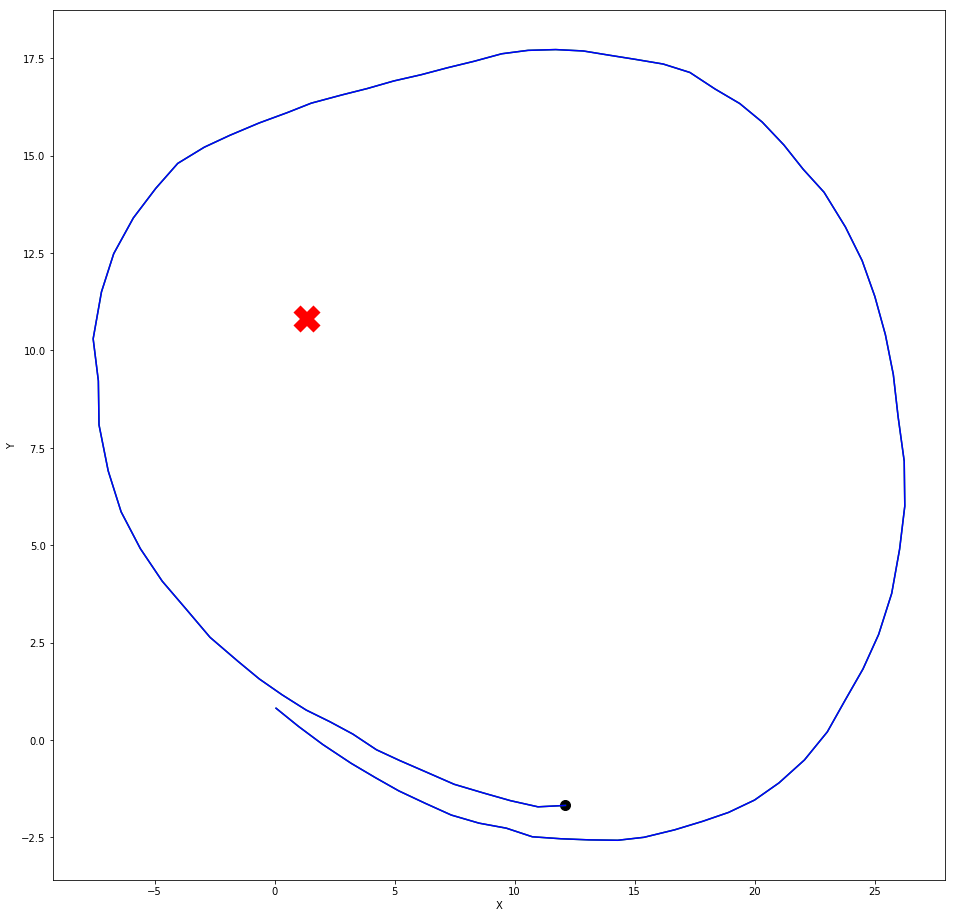

In [17]:
plt.rcParams["figure.figsize"] = [16, 16]
p1 = plt.plot([xs[0]], [ys[0]], 'ko', ms=10.0)
p2 = plt.plot(xs, ys, 'g', ms=10.)
# p3 = plt.plot(final_xs, final_ys, 'c', ms=5.0)
# p4 = plt.plot(current_xs, current_ys, 'y', lw=5.0)
# p5 = plt.plot([current_xs[0]], [current_ys[0]], 'ko', ms=15.0)
p6 = plt.plot(xs_3, ys_3, 'b', ms=5.)
# p7 = plt.plot(final_xs_3, final_ys_3, 'k', ms=5.0)
# p8 = plt.plot(current_xs_3, current_ys_3, 'r', lw=5.0)
# p9 = plt.plot([current_xs_3[0]], [current_ys_3[0]], 'ko', ms=15.0)
# p10 = plt.plot([final_xs[0]], [final_ys[0]], 'bo', ms=15.0)
# p6 = plt.plot([xs[26]], [ys[26]], 'gx', ms=20.0, mew=10.0)
p7 = plt.plot([1.3549], [10.8159], 'rx', ms=20.0, mew=10.0)
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)
# plt.legend((p2[0], p1[0], p4[0], p5[0], p3[0], p6[0], p7[0]), ('base_waypoints', 'first_base', 'final_waypoints', 'current position', 'first current', 'dbw enabled', 'dbw disabled'), loc=0)
plt.savefig("../imgs/third_waypoints.png")
plt.show()

In [2]:
church_xs = list()
church_ys = list()
church_zs = list()
church_yaws = list()
with open('./churchlot_with_cars.csv') as f:
    for line in f:
        columns = line.split(',')
        church_xs.append(columns[0])
        church_ys.append(columns[1])
        church_zs.append(columns[2])
        church_yaws.append(columns[3])

In [3]:
yaw_xs = list()
yaw_ys = list()

with open('./wp_yaw_const.csv') as f:
    for line in f:
        columns = line.split(',')
        yaw_xs.append(columns[0])
        yaw_ys.append(columns[1])

In [4]:
filter_xs = list()
filter_ys = list()

with open('./filter.csv') as f:
    for line in f:
        columns = line.split(',')
        filter_xs.append(columns[0])
        filter_ys.append(columns[1])

In [31]:
current_xs = list()
current_ys = list()
for row_idx, row in current_pose.iterrows():
    for col_idx, item in row.iteritems():
        if "position" in col_idx:
            axis = col_idx.split(".")[-1]
            if axis == 'x':
                current_xs.append(item)
            if axis == 'y':
                current_ys.append(item)

In [38]:
sim_xs = list()
sim_ys = list()

with open('./sim_waypoints.csv') as f:
    for line in f:
        columns = line.split(',')
        sim_xs.append(columns[0])
        sim_ys.append(columns[1])

In [64]:
len(church_xs)

61

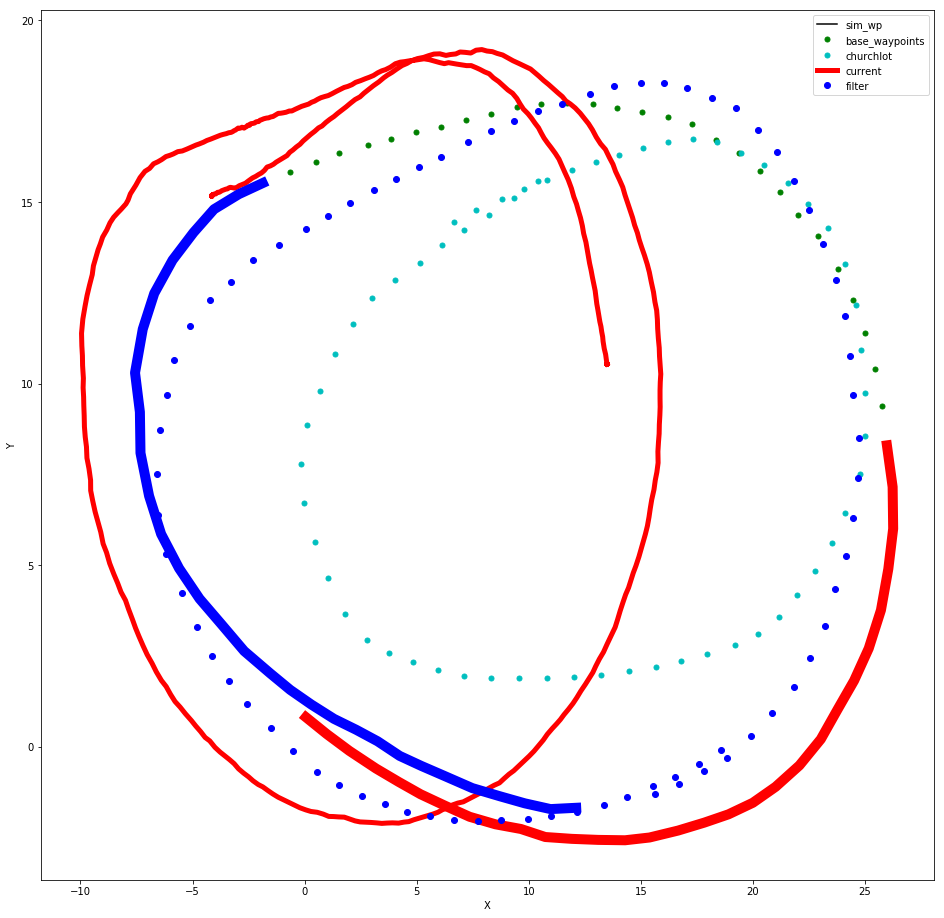

In [66]:
plt.rcParams["figure.figsize"] = [16, 16]
# p1 = plt.plot(sim_xs, sim_ys, 'k', ms=10.0)
p2 = plt.plot(xs, ys, 'go', ms=5.0)
p3 = plt.plot(church_xs, church_ys, 'co', ms=5.0)
p4 = plt.plot(current_xs, current_ys, 'r', lw=5.0)
p5 = plt.plot(xs[-30:], ys[-30:], 'r', lw=10.0)
p6 = plt.plot(xs[:30], ys[:30], 'b', lw=10.0)
p7 = plt.plot(filter_xs, filter_ys, 'bo')
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)
plt.legend((p1[0], p2[0], p3[0], p4[0], p7[0]), ('sim_wp', 'base_waypoints', 'churchlot', 'current', 'filter'), loc=0)
# plt.savefig("../imgs/all_waypoints.png")
plt.show()